In [283]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [284]:
# Step 1: Connect to the SQLite database
db_path = r"..\databases\deliveroo.db"
connection = sqlite3.connect(db_path)
cursor = connection.cursor()

In [285]:
# Step 2: Query the top pizza restaurants
query = """
SELECT name AS restaurant_name, category, address, rating
FROM restaurants
WHERE category LIKE '%pizza%'
ORDER BY rating DESC
LIMIT 10;
"""

In [286]:
# Step 3: Create a DataFrame
top_pizza_df = pd.DataFrame(results, columns=["Restaurant Name", "Category", "Address", "Rating"])

In [287]:
# Step 4: Add a star rating column
top_pizza_df["Star Rating"] = top_pizza_df["Rating"].apply(lambda x: "★" * int(x) + "☆" * (5 - int(x)))

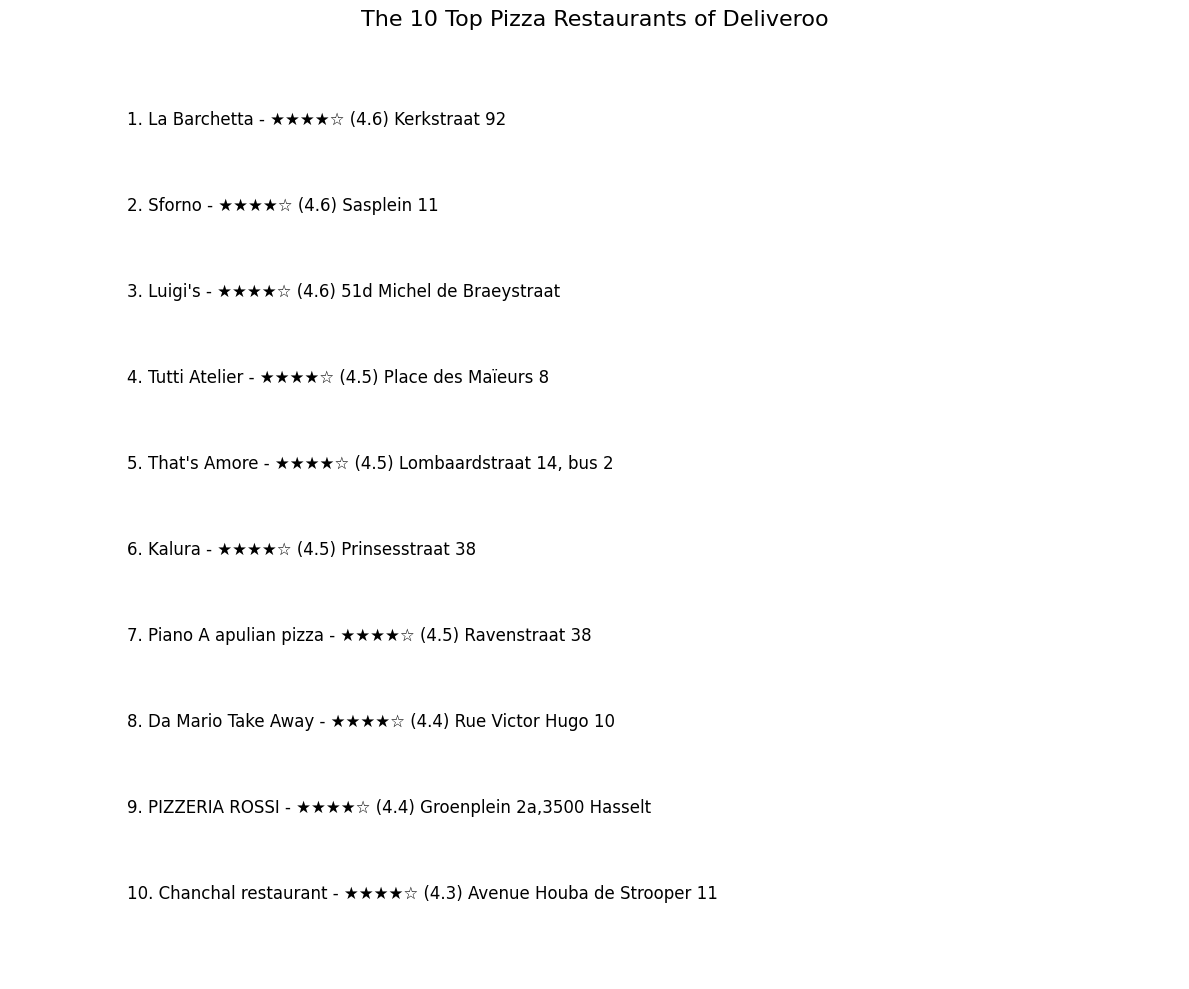

In [288]:
# Step 5: Generate the visualization
fig, ax = plt.subplots(figsize=(12, len(top_pizza_df)))  # Dynamically adjust size based on number of entries

# Iterate over the DataFrame to add sequential numbering, restaurant, rating, and location details
for i, row in top_pizza_df.iterrows():
    plt.text(
        0.1,
        len(top_pizza_df) - 1 - i,  # Adjust for proper positioning from top to bottom
        f"{i + 1}. {row['Restaurant Name']} - {row['Star Rating']} ({row['Rating']:.1f}) {row['Address']}",
        fontsize=12,
        color="black",
        verticalalignment="center"
    )

# Add a title to the visualization
plt.title("The 10 Top Pizza Restaurants of Deliveroo", fontsize=16)

# Turn off axes for a clean visual
plt.gca().axis("off")
plt.gca().set_ylim(-1, len(top_pizza_df))  # Adjust y-axis limits for proper spacing

# Display the chart
plt.tight_layout()
plt.show()
